In [1]:
print("Naive bayes basic and its types all in details ")

Naive bayes basic and its types all in details 


In [2]:
#import basic setup for naive bayes 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(7,4)

A numeric dataset (Breast Cancer Wisconsin) using GaussianNB.

This is a binary classification problem:

Class 0: malignant

Class 1: benign


In [3]:
#Load and inspect the dataset 

data=load_breast_cancer()


x=data.data
y=data.target

print("Shape of x (feature ) :",x.shape)

print("Shape of y (feature ) :",y.shape)



Shape of x (feature ) : (569, 30)
Shape of y (feature ) : (569,)


In [4]:
print("Feature names of this dataset \n:",data.feature_names)

print( )

print("Target of this dataset \n:",data.target_names)


Feature names of this dataset 
: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target of this dataset 
: ['malignant' 'benign']


In [5]:

print(x)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [6]:
#here our data is in a numpy so we create a dataframe to store all the numpy value

df=pd.DataFrame(x,columns=data.feature_names)
df['target']=y
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
# we want to see the how much the value target value which is what portion in our dataset

class_count=df['target'].value_counts()
print(class_count)

target
1    357
0    212
Name: count, dtype: int64


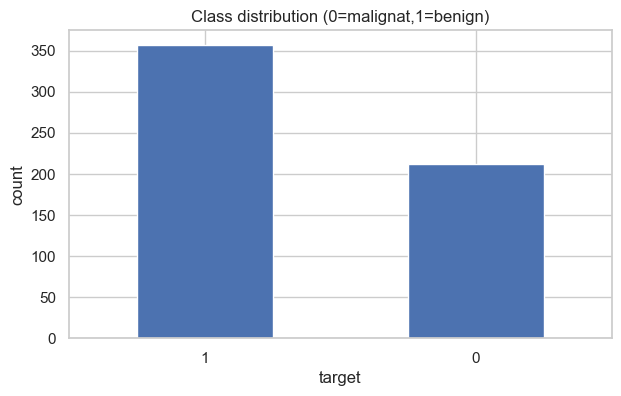

In [8]:
#now we see the value as a visual state 

plt.figure()
class_count.plot(kind='bar')
plt.xticks(ticks=[0,1],label=data.target_names,rotation=0)
plt.title("Class distribution (0=malignat,1=benign)")
plt.ylabel('count')
plt.show()

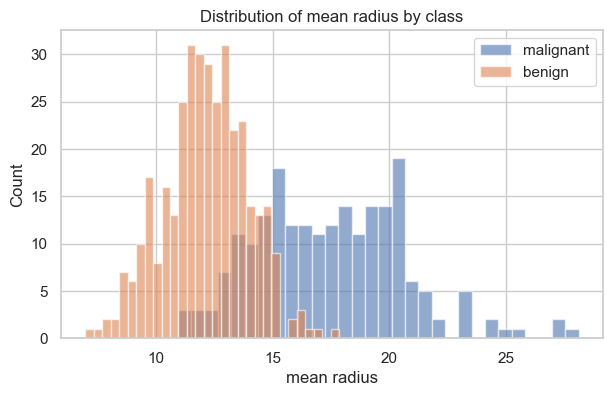

In [9]:
feature_name = 'mean radius'
feat_idx = list(data.feature_names).index(feature_name)

plt.figure()
plt.hist(x[y==0][:, feat_idx], bins=30, alpha=0.6, label='malignant')
plt.hist(x[y==1][:, feat_idx], bins=30, alpha=0.6, label='benign')
plt.legend()
plt.xlabel(feature_name)
plt.ylabel('Count')
plt.title(f'Distribution of {feature_name} by class')
plt.show()

Train test split 

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)


প্রথমে বুঝি সমস্যাটা কী (stratify ছাড়া কী হয়?)

ব্রেস্ট ক্যান্সার ডেটাসেটে মোট স্যাম্পল: ৫৬৯টা

Benign (ক্যান্সার নেই, লেবেল ১): প্রায় ৩৫৭টা (৬৩%)

Malignant (ক্যান্সার আছে, লেবেল ০): প্রায় ২১২টা (৩৭%)

যদি আমরা stratify=y না দিই, তাহলে train_test_split ডেটা র‍্যান্ডমলি ভাগ করবে।

এতে হতে পারে:

ট্রেনিং সেটে শুধু benign বেশি পড়ে গেল (যেমন ৭০% benign)

টেস্ট সেটে malignant বেশি পড়ে গেল (যেমন ৫৫% malignant)

এটা খারাপ কারণ:

মডেল ট্রেনিং-এ এক ধরনের ডেটা বেশি দেখবে

টেস্টিং-এ অন্যরকম ডেটা পাবে → অ্যাকুরেসি ভুলভাবে মাপা হবে

মডেলের পারফরম্যান্সের সঠিক ধারণা পাওয়া যাবে না

In [11]:
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

Training set shape: (426, 30)
Test set shape: (143, 30)


Train Gaussian Naive Bayes 

In [12]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

Prediction and Accuracy

In [13]:
y_pred=gnb.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("accuracy_score on test set is :",acc)

accuracy_score on test set is : 0.9370629370629371


Confusion matrix

In [14]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix is : \n",cm)

Confusion matrix is : 
 [[46  7]
 [ 2 88]]


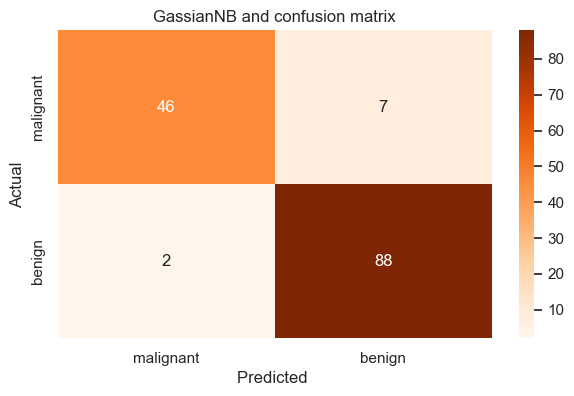

In [15]:
#plot the confusion matrix 
sns.heatmap(cm,annot=True,fmt='d',cmap="Oranges",
            xticklabels=data.target_names,
            yticklabels=data.target_names)

plt.xlabel("Predicted ")
plt.ylabel("Actual")
plt.title("GassianNB and confusion matrix")
plt.show()

In [16]:
#classification report 

print(classification_report(y_test,y_pred,target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.96      0.87      0.91        53
      benign       0.93      0.98      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



 Short Interpretation

precision for malignant tells us: out of all samples predicted as malignant, how many were actually malignant.

recall for malignant tells us: out of all truly malignant cases, how many we correctly caught.

In medical tasks, recall for malignant is very important (missing a cancer case is risky).

Naive Bayes uses mean and variance of each feature per class under the Gaussian assumption.

In [17]:
print("MultinomialNB  on Text Data ")

MultinomialNB  on Text Data 


Part B – Multinomial Naive Bayes on Text Data

Now we move to a **text classification** setting, where Naive Bayes is very powerful.
We will first use a tiny custom dataset for intuition, then show how to scale to a larger dataset


Create a tiny data set to apply Naive Bayes 



In [18]:
#custom data set 

texts=[
    "I love this product",
    'This is amazing and fantastic',
    'I really like this',
    'I hate this item',
    'This is the worst thing ever',
    'Horrible and terrible experience'
]

labels=[1,1,1,0,0,0]# 1= positive , and 0 = negatives

df=pd.DataFrame({'text':texts,'label':labels})
df

,text,label
0,I love this product,1
1,This is amazing and fantastic,1
2,I really like this,1
3,I hate this item,0
4,This is the worst thing ever,0
5,Horrible and terrible experience,0


sklearn.feature_extraction.text.CountVectorizer

কাজ: টেক্সট ডেটাকে নামেরিক ফিচারে কনভার্ট করে (Bag of Words মডেল)।

বিস্তারিত: 

টেক্সট থেকে শব্দ গণনা করে একটি ম্যাট্রিক্স তৈরি করে, যেখানে প্রতি রো একটি ডকুমেন্ট এবং কলাম প্রতি শব্দের কাউন্ট। টেক্সট-ভিত্তিক মেশিন লার্নিং-এর জন্য প্রয়োজনীয়।

In [19]:
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(df['text'])
y=df['label']

print("feature matrix shape : ",x.shape)
print("Vocabulary :",vectorizer.get_feature_names_out())

feature matrix shape :  (6, 18)
Vocabulary : ['amazing' 'and' 'ever' 'experience' 'fantastic' 'hate' 'horrible' 'is'
 'item' 'like' 'love' 'product' 'really' 'terrible' 'the' 'thing' 'this'
 'worst']


Train  multinomial Naive mayes on this data set 


In [20]:
mnb=MultinomialNB()
mnb.fit(x,y)

y_pred_text=mnb.predict(x)

acc_text=accuracy_score(y,y_pred_text)
print("The accuracy of this  text data set is :",acc_text)

classification_Re=classification_report(y,y_pred_text)
print("\n classification report is \n :",classification_Re)

The accuracy of this  text data set is : 1.0

 classification report is 
 :               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [ ]:
#Try new sentence  but model we train before use same model

new_text=[
    'I love it',
    'The product is horrible',
    'Fantastic experience',
    'Worst purchase ever'
]

x_new=vectorizer.transform(new_text)
new_pred=mnb.predict(x_new)

In [22]:
for txt,pred in zip(new_text,new_pred):
    label_str='positive' if pred == 1 else 'negative'
    print(f'{txt!r}->{label_str}')

'I love it'->positive
'The product is horrible'->negative
'Fantastic experience'->positive
'Worst purchase ever'->negative


Scaling Up : News groups Subsets 

now we use a subset of the classic 20 Newsgroups dataset .we chooe three 

categories to keep it manageable
     . comp.graphics

     . rec.sport.baseball

     . sci.med

This shows how the exact same naive Bayes idea scales to real text 

classification 




https://colab.research.google.com/drive/1-LeiCm2gBBZ7lii-nDTiSerocCfbyPp2#scrollTo=2cd1c264

here is my colab link here is the data and newspaper group model you find 


https://colab.research.google.com/drive/19357JjkXhiu554T-UQLATSCY7rqWOWOF

## Summary

In this notebook we have seen how to:

**Numeric data (GaussianNB):**


- Load a real dataset (breast cancer)

- Explore class balance and simple feature distributions

- Train a Gaussian Naive Bayes model

- Evaluate with accuracy, confusion matrix, and classification report

**Text data (MultinomialNB):**


- Build a tiny custom sentiment dataset for intuition

- Use `CountVectorizer` to convert text into word count features

- Train `MultinomialNB` and test on new sentences

- Scale the same idea to a real text dataset (20 Newsgroups subset)

- Evaluate performance on multi class text classification